## Jupyter notebook Lars Rook & Sem van der Hoeven

# Week 4

## 4.1: ZTDL 1 - First Deep Learning Model
We hebben bij elk code blok comments gezet die uitleggen wat de code doet.

In [1]:
import numpy as np # import the numpy library and assign the name np to it

# magic function that sets the backend of matplotlib to the inline backend
# source: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline 
import matplotlib.pyplot as plt # import the matplotlib.pyplot and assign the name plt to it

In [2]:
from sklearn.datasets import make_circles # import the make_circles module from the sklearn.datasets module

In [3]:
"""
roept de make_circles functie aan van de sklearn.datasets module
de make_circles functie maakt een cirkel met een kleinere cirkel hier binnen in.
- de n_samples staat voor hoeveel points gegenereerd moeten worden.
- de noise variabele staat voor hoeveel noise eraan toegeoegd moet worden
- de factor staat voor de schaling tussen de binnenste en buitenste cirkel
- de random_state variabele wordt gebruikt voor het genereren van een random nummer die gebruikt wordt voor het shufflen van de dataset en de noise.
"""

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [4]:
# X bevat de gegenereerde samples van de make_circles methode.

X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [6]:
# aangezien x de array of shape [n_samples, 2] bevat, geeft dit de gegeven aantal samples en 2.
X.shape

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

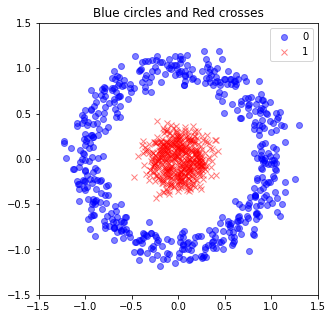

In [5]:
"""
Hier wordt met matplotlib een grafiek van de samples getekend.
allereerst wordt er een figuur aangemaakt, daarna worden de waarden die zijn gegenereerd getekend op deze figuur.
Hierna worden de limits van de x en y assen gezet.
Daarna wordt de legenda aangemaakt, hierbij zijn de bolletjes een 0 en de kruisjes een 1.
Als laatst wordt de titel van de figuur aangemaakt.
"""

plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [6]:
# importeer modules van tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
# Maak een sequentieel model aan
model = Sequential()

In [8]:
# voeg een laag aan het model toe met 4 output neurons en 2 input neurons. Deze laag gebruikt de hyperbolic tangent activation functie.
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [9]:
# voeg nog een laag toe met 1 output neuron. Deze laag gebruikt de Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x))
model.add(Dense(1, activation='sigmoid'))

In [10]:
"""
compile configureert het model voor het trainen.
- als optimizer wordt de gradient descent optimizer gebruikt met een learning rate van 0.5
- als loss wordt binary cross entropy gebruikt. 
- bij de metrics parameter wordt een lijst van attributen gezet waarop het model wordt geëvalueerd. In dit geval is het alleen de nauwkeurigheid
""" 
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [11]:
"""
fit traint het model voor het aantal gegeven epochs.
- X staat voor de input samples.
- y staat voor de target data (tensors)
- epochs staat voor hoe vaak het model getrained wordt.
"""
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6200
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8240
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.9510
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.9940
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 1.0000
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 1.0000
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 1.0000
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 1.0000
Epoch 11/20
32/32 [

In [12]:
"""
met de linspace functies worden nummers gegenereerd over een gelijk interval.
met de meshgrid functies worden coordinate matrices gemaakt van coordinate vectors.
met de c_ functie wordt een matrix gemaakt van de genenereerde arrays.
met de predict functie worden output predictions gegenereerd voor de input samples.
met de reshape functie wordt de shape aangepast naar die van de meshgrid.
"""
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

In [14]:
ab

array([[-1.5 , -1.5 ],
       [-1.47, -1.5 ],
       [-1.44, -1.5 ],
       ...,
       [ 1.44,  1.5 ],
       [ 1.47,  1.5 ],
       [ 1.5 ,  1.5 ]])

Text(0.5, 1.0, 'Blue circles and Red crosses')

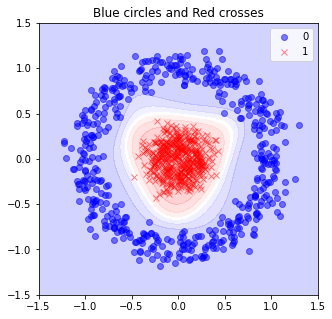

In [13]:
"""
Hier wordt met matplotlib een grafiek van de samples getekend.
allereerst wordt er een figuur aangemaakt
Daarna wordt de contour getekend aan de hand van de output van het model.
Daarna worden de waarden die zijn gegenereerd getekend op deze figuur.
Hierna worden de limits van de x en y assen gezet.
Daarna wordt de legenda aangemaakt, hierbij zijn de bolletjes een 0 en de kruisjes een 1.
Als laatst wordt de titel van de figuur aangemaakt.
"""
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

## 4.2 : ZTDL 2 - Data

a. we hebben allebei het notebook bestudeerd.
b. we hebben een spreadsheet gevonden over heart attack analysis and predictions.
c. Hieronder zijn een aantal technieken en plots te zien die wij op de data hebben uitgevoerd. Om het beter te begrijpen hebben wij allebei samen de technieken en plots uitgevoerd.

### Standaard info
We hebben eerst de standaard gegevens van de dataset verkend.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/heart.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### indexing
We zullen nu verschillende items in de dataset indexeren

In [12]:
# het 10de element ophalen uit de dataset
df.iloc[10]

age          54.0
sex           1.0
cp            0.0
trtbps      140.0
chol        239.0
fbs           0.0
restecg       1.0
thalachh    160.0
exng          0.0
oldpeak       1.2
slp           2.0
caa           0.0
thall         2.0
output        1.0
Name: 10, dtype: float64

In [16]:
# de age, sex en oldpeak van de eerste 9 elementen ophalen
df.loc[0:8,['age','sex','oldpeak']]

,age,sex,oldpeak
0,63,1,2.3
1,37,1,3.5
2,41,0,1.4
3,56,1,0.8
4,57,0,0.6
5,57,1,0.4
6,56,0,1.3
7,44,1,0.0
8,52,1,0.5


In [17]:
# de head opvragen van de elementen met het sex attribuut
df['sex'].head()

0    1
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

In [18]:
# unieke element van sex ophalen
df['sex'].unique()

array([1, 0], dtype=int64)

In [20]:
# sorteer de values van attribuut age op optellende manier
df.sort_values('age', ascending = True)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


<AxesSubplot:title={'center':'age chol relation'}>

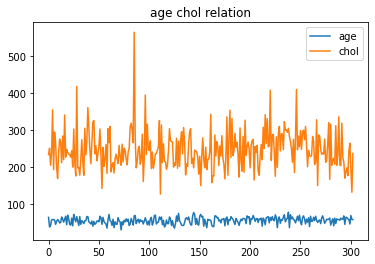

In [25]:
dfplot = df[['age','chol']]
dfplot.plot(title='age chol relation')

In [26]:
amountMale = df['sex'] > 0 # assuming male = 1
piecounts = amountMale.value_counts()
piecounts

True     207
False     96
Name: sex, dtype: int64

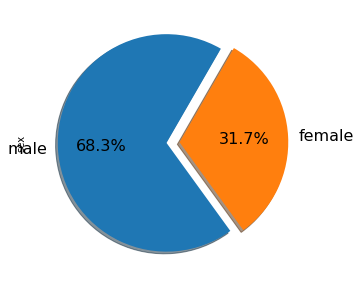

In [36]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.12],
               labels=['male', 'female'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=60,
               fontsize=16);

## 4.3 : ZTDL 3 – Machine Learning

### Linear regression
Deze code blokken zijn nodig als setup voor de linear regression met keras
We hebben gekozen voor een dataset die gebruikt kan worden voor linear regression. De dataset heeft geen bepaalde betekenis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#  read the csv file into the df variable
df = pd.read_csv('../data/test.csv')

In [3]:
# check out what is in the first few lines
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


<AxesSubplot:title={'center':'x and y in the dataset'}, xlabel='x', ylabel='y'>

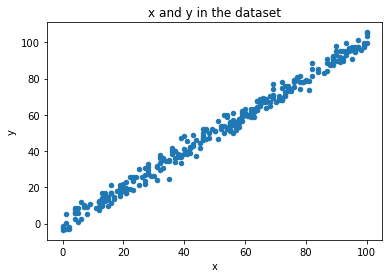

In [4]:
# plot the points in the dataset
df.plot(kind='scatter',
        x='x',
        y='y',
        title='x and y in the dataset')

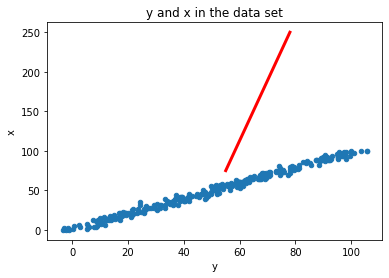

In [6]:
# plot the points again
df.plot(kind='scatter',
        x='x',
        y='y',
        title='y and x in the data set')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [7]:
# define a method to calculate a point for a line given the input values
def line(x, w=0, b=0):
    return x * w + b

In [8]:
# generate evenly spaced numbers 
x = np.linspace(55, 80, 100)

In [9]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [10]:
# generate line points
yhat = line(x, w=0, b=0)

In [11]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

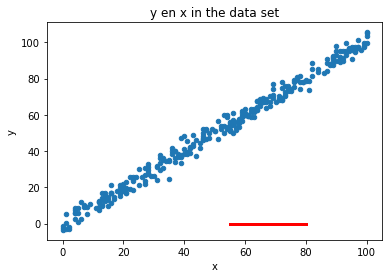

In [12]:
# draw the points again, now with the line
df.plot(kind='scatter',
        x='x',
        y='y',
        title='y en x in the data set')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost function

In [13]:
# calculate the mean squared error given the input parameters.
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [15]:
# get the x and y values from the dataset
X = df[['x']].values
y_true = df['y'].values

In [16]:
y_true

array([ 79.77515201,  23.17727887,  25.60926156,  17.85738813,
        41.84986439,   9.80523488,  58.87465933,  97.61793701,
        18.39512747,   8.74674765,   2.81141583,  17.09537241,
        95.14907176,  61.38800663,  40.24701716,  14.82248589,
        66.95806869,  16.63507984,  90.65513736,  77.22982636,
        92.11906278,  46.91387709,  89.82634442,  21.71380347,
        97.41206981,  57.01631363,  78.31056542,  19.1315097 ,
        93.03483388,  26.59112396,  97.55155344,  31.43524822,
        35.12724777,  78.61042432,  33.07112825,  51.69967172,
        53.62235225,  69.46306072,  27.42497237,  36.34644189,
        95.06140858,  68.16724757,  50.96155532,  78.04237454,
         5.60766487,  36.11334779,  67.2352155 ,  65.01324035,
        38.14753871,  34.31141446,  95.28503937,  87.84749912,
        54.08170635,  31.93063515,  59.61247085,  -1.04011421,
        47.49374765,  62.60089773,  70.9146434 ,  56.14834113,
        14.05572877,  68.11367147,  75.59701346,  59.22

In [17]:
# convert the points of the y values to line points
y_pred = line(X)

In [18]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [19]:
# calculate the mean square error for the points
mean_squared_error(y_true, y_pred.ravel())

3464.291087139079

### Linear regression with keras

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [21]:
model = Sequential()

In [22]:
# make a model with 1 layer, 1 output node and 1 input node
model.add(Dense(1, input_shape=(1,)))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# get the model ready for training
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [25]:
# start training the model for 40 epochs
model.fit(X, y_true, epochs=40)

Epoch 1/40
10/10 [==============================] - 0s 889us/step - loss: 276.5771
Epoch 2/40
10/10 [==============================] - 0s 889us/step - loss: 70.1189
Epoch 3/40
10/10 [==============================] - 0s 893us/step - loss: 38.0515
Epoch 4/40
10/10 [==============================] - 0s 1ms/step - loss: 27.3967
Epoch 5/40
10/10 [==============================] - 0s 1ms/step - loss: 25.7747
Epoch 6/40
10/10 [==============================] - 0s 777us/step - loss: 20.8342
Epoch 7/40
10/10 [==============================] - 0s 1ms/step - loss: 15.4722
Epoch 8/40
10/10 [==============================] - 0s 997us/step - loss: 9.9356
Epoch 9/40
10/10 [==============================] - 0s 778us/step - loss: 9.9688
Epoch 10/40
10/10 [==============================] - 0s 1ms/step - loss: 10.1344
Epoch 11/40
10/10 [==============================] - 0s 1ms/step - loss: 10.7054
Epoch 12/40
10/10 [==============================] - 0s 889us/step - loss: 9.7593
Epoch 13/40
10/10 [======

In [26]:
y_pred = model.predict(X)

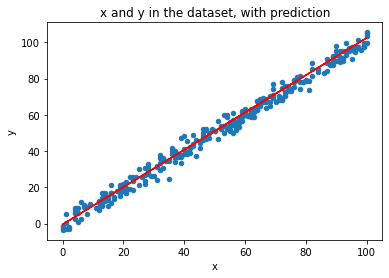

In [27]:
df.plot(kind='scatter',
        x='x',
        y='y',
        title='x and y in the dataset, with prediction')
plt.plot(X, y_pred, color='red')

In [28]:
W, B = model.get_weights()

In [29]:
W

array([[1.030289]], dtype=float32)

In [30]:
B

array([-0.44838893], dtype=float32)